In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [148]:
def kinesin1_velocity(F):
    dstep = 8.2
    d1 = 4.6
    d3 = 0.35
    k1 = 4900
    k2 = 95
    k3 = 260
    Fi = 26
    kT = 4.114
    exp1 = np.exp(-F * d1 / kT)
    exp2 = np.exp((-F + Fi) * d3 / kT)
    numerator = dstep * k1 * k2 * k3 * exp1 * exp2
    denom = k1 * k2 * exp1 + k3 * exp2 * (k1 * exp1 + k2)
    return numerator / denom

def linear_vdep_model(F, Fstall=6.4):
    v0 = kinesin1_velocity(0)
    fdep = 1. - (F / Fstall)
    if isinstance(fdep, float):
        fdep = 1 if fdep > 1 else fdep
        fdep = 0 if fdep < 0 else fdep
    else:
        fdep[fdep < 0] = 0
        fdep[fdep > 1] = 1
    return v0 * fdep

def exp_vdep_model(F, Fstall=4):
    if isinstance(F, float) or isinstance(F, int):
        Fext = 0 if F < 0 else F
    else:
        Fext = F.copy()
        Fext[Fext<0] = 0
    v0 = kinesin1_velocity(0)
    fdep = np.exp(-(Fext/Fstall)**2.65)
    return v0 * fdep

In [149]:
x = np.linspace(-5, 10, 100)
y = kinesin1_velocity(x)
ym = linear_vdep_model(x)
ymexp = exp_vdep_model(x)

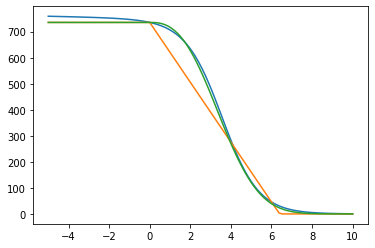

In [150]:
plt.figure()
plt.plot(x, y)
plt.plot(x, ym)
plt.plot(x, ymexp)
plt.show()

In [6]:
print(kinesin1_velocity(0))

734.9390560697758


## Parameters of Kinesin-1
v = "735 nm/s"  (1.05 sigma per tau)
from Examining kinesin processivity within a general gating framework, Andreasson 2015 eLife

k_a = "5 s^-1" (0.18 per tau)  # per kinesin, so multiply by number concentration at interface of MT
From: Membrane-Bound Kinesin Transport and its Applications in Active Matter, 2019 (thesis by Lopes from UC Merced)
and ((C. Leduc, O. Campàs, K. B. Zeldovich, A. Roux, P. Jolimaitre, L. Bourel-Bonnet, B. Goud, J.-F. Joanny, P. Bassereau and J. Prost, "Cooperative extraction of membrane nanotubes by molecular motors," Proceedings of the National Academy of Sciences, vol. 101, no. 49, pp. 17096-17101, 2004.)) which found that the association rate per kinesin molecule was about 5 per second

k_u = "0.42 s^-1" (0.015 per tau)
from Direct observation of single kinesin molecules moving along microtubules, Vale, R. D., Funatsu, T., Pierce, D. W., Romberg, L., Harada, Y. & Yanagida, T. (1996) Nature 380 , 451–453. pmid:8602245 

f_stall = 6 pN (37.5 in sim units) from references mentioned above (approx)

k_spring = 0.3 pN/nm (47 in sim units) (reference from Robert's thesis)

fdep_unbind_factor = 0.6 nm (.024 sigma in sim units)

rest_length = 60 nm (2.4 in sim units) I'm not worrying about extra distance from center of MT to surface, since the rest length is from structure data and there are probably some entropic considerations

## time constant in simulation

D = kT/3 pi eta d
d = 25 nm
kT = 4.114 pN nm
eta = 1 Pa. s = 1 * 10^12 * 10^-18 pN nm^-2 s (cytoplasm, reference from Robert's thesis)
kT/(eta * d) = nm^2/s
tau = 0.0358 s (from below calculation and from Robert's thesis)

In [188]:
D = (4.114 / (np.pi * 3 * 1 * 10**12 * 10**-18 * 25))
tau = 25**2/D

In [189]:
tau

0.03579537084030665

In [190]:
5*tau

0.17897685420153325

In [192]:
0.18

0.015119999999999998

In [191]:
0.42/5

0.08399999999999999

In [169]:
0.165 pN

0.16455999999999998

In [198]:
735/25*0.0358

1.05252

In [196]:
6/0.16

37.5

In [201]:
0.3*25/0.16

46.875

In [202]:
0.6/25

0.024